# Task 1

---

## A) Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 38
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

In [ ]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

## B) Data Preprocessing

### 1) Text Cleaning

In [2]:
df = pd.read_csv('BA_reviews.csv',index_col='Unnamed: 0')
df.head()

,reviews
0,✅ Trip Verified | I booked our first out of c...
1,✅ Trip Verified | My husband and I booked seat...
2,"Not Verified | May 3, flew from Seattle to He..."
3,✅ Trip Verified | I went through three flights...
4,✅ Trip Verified | An excellent flight in Club ...


In [3]:
df.reviews= df.reviews.str.split('|',expand=True)[1].str.lower()

In [4]:
df.head()

,reviews
0,i booked our first out of country trip to ta...
1,my husband and i booked seats within our prem...
2,"may 3, flew from seattle to heathrow then to..."
3,i went through three flights to reach my dest...
4,an excellent flight in club world on british ...


### 2) Tokenization

In [5]:
import nltk
nltk.download('punkt')  # Download the necessary tokenizer resources

from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Islam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
df['Tokenized'] = df['reviews'].apply(word_tokenize)

In [7]:
df.head()

,reviews,Tokenized
0,i booked our first out of country trip to ta...,"[i, booked, our, first, out, of, country, trip..."
1,my husband and i booked seats within our prem...,"[my, husband, and, i, booked, seats, within, o..."
2,"may 3, flew from seattle to heathrow then to...","[may, 3, ,, flew, from, seattle, to, heathrow,..."
3,i went through three flights to reach my dest...,"[i, went, through, three, flights, to, reach, ..."
4,an excellent flight in club world on british ...,"[an, excellent, flight, in, club, world, on, b..."


### 3) POS Tagging

In [8]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Islam\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Islam\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Islam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Islam\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
df['POS Tagged'] = None
pos_mapping = {
    'NN': 'n',  # Noun
    'VB': 'v',  # Verb
    'VBD': 'v',  # Verb - past tense
    'VBG': 'v',  # Verb - gerund or present participle
    'VBN': 'v',  # Verb - past participle
    'JJ': 'a',  # Adjective
    'JJR': 'a',  # Adjective - comparative
    'JJS': 'a',  # Adjective - superlative
    'RB': 'r',  # Adverb
    'RBR': 'r',  # Adverb - comparative
    'RBS': 'r'   # Adverb - superlative
}
for index, row in enumerate(df['Tokenized']):
    pos = pos_tag(df.loc[index, 'Tokenized'])
    pos = [(word, pos_mapping.get(tag)) for word, tag in pos]
    df.at[index, 'POS Tagged'] = [(word,tag) for word, tag in pos if tag != None] 
        
         
    


df.head()

,reviews,Tokenized,POS Tagged
0,i booked our first out of country trip to ta...,"[i, booked, our, first, out, of, country, trip...","[(i, n), (booked, v), (first, a), (country, n)..."
1,my husband and i booked seats within our prem...,"[my, husband, and, i, booked, seats, within, o...","[(husband, n), (i, n), (booked, v), (premium, ..."
2,"may 3, flew from seattle to heathrow then to...","[may, 3, ,, flew, from, seattle, to, heathrow,...","[(flew, v), (seattle, n), (heathrow, v), (then..."
3,i went through three flights to reach my dest...,"[i, went, through, three, flights, to, reach, ...","[(i, n), (went, v), (reach, v), (destination, ..."
4,an excellent flight in club world on british ...,"[an, excellent, flight, in, club, world, on, b...","[(excellent, a), (flight, n), (club, n), (worl..."


### 4) Stop Word Removal

In [10]:
df['Stopwords Removed'] = None

for index, row in enumerate(df['POS Tagged']):
    words = []
    for word in row:
        if word[0] not in set(stopwords.words('english')):
            words.append(word)
    df.at[index, 'Stopwords Removed'] = words
        
         
    


df.head()

,reviews,Tokenized,POS Tagged,Stopwords Removed
0,i booked our first out of country trip to ta...,"[i, booked, our, first, out, of, country, trip...","[(i, n), (booked, v), (first, a), (country, n)...","[(booked, v), (first, a), (country, n), (trip,..."
1,my husband and i booked seats within our prem...,"[my, husband, and, i, booked, seats, within, o...","[(husband, n), (i, n), (booked, v), (premium, ...","[(husband, n), (booked, v), (premium, a), (eco..."
2,"may 3, flew from seattle to heathrow then to...","[may, 3, ,, flew, from, seattle, to, heathrow,...","[(flew, v), (seattle, n), (heathrow, v), (then...","[(flew, v), (seattle, n), (heathrow, v), (edin..."
3,i went through three flights to reach my dest...,"[i, went, through, three, flights, to, reach, ...","[(i, n), (went, v), (reach, v), (destination, ...","[(went, v), (reach, v), (destination, n), (ba,..."
4,an excellent flight in club world on british ...,"[an, excellent, flight, in, club, world, on, b...","[(excellent, a), (flight, n), (club, n), (worl...","[(excellent, a), (flight, n), (club, n), (worl..."


### 4) Lemmatization or Stemming

In [11]:
from nltk.stem import WordNetLemmatizer

In [12]:
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['Stopwords Removed'].apply(lemmatize)
df.head() 

,reviews,Tokenized,POS Tagged,Stopwords Removed,Lemma
0,i booked our first out of country trip to ta...,"[i, booked, our, first, out, of, country, trip...","[(i, n), (booked, v), (first, a), (country, n)...","[(booked, v), (first, a), (country, n), (trip,...",book first country trip take husband surpris...
1,my husband and i booked seats within our prem...,"[my, husband, and, i, booked, seats, within, o...","[(husband, n), (i, n), (booked, v), (premium, ...","[(husband, n), (booked, v), (premium, a), (eco...",husband book premium economy book outward jo...
2,"may 3, flew from seattle to heathrow then to...","[may, 3, ,, flew, from, seattle, to, heathrow,...","[(flew, v), (seattle, n), (heathrow, v), (then...","[(flew, v), (seattle, n), (heathrow, v), (edin...",fly seattle heathrow edinburgh ba lose golf ...
3,i went through three flights to reach my dest...,"[i, went, through, three, flights, to, reach, ...","[(i, n), (went, v), (reach, v), (destination, ...","[(went, v), (reach, v), (destination, n), (ba,...",go reach destination ba exception delay way ...
4,an excellent flight in club world on british ...,"[an, excellent, flight, in, club, world, on, b...","[(excellent, a), (flight, n), (club, n), (worl...","[(excellent, a), (flight, n), (club, n), (worl...",excellent flight club world british welcome ...


### 5) Handling Typos and Spelling Corrections

In [15]:
import enchant

dictionary = enchant.Dict("en_US")

def correct_spelling(text):
    # Split the text into words
    words = text.split()

    # Correct misspelled words using the dictionary
    corrected_text = ''
    for word in words:
        corrected_word = word
        if not dictionary.check(word):
            suggestions = dictionary.suggest(word)
            if suggestions:
                corrected_word = suggestions[0]
        corrected_text += ' ' + corrected_word

    return corrected_text.strip()

# Apply to column
df['corrected_Lemma'] = df['Lemma'].apply(correct_spelling) 

In [16]:
df.head()

,reviews,Tokenized,POS Tagged,Stopwords Removed,Lemma,corrected_Lemma
0,i booked our first out of country trip to ta...,"[i, booked, our, first, out, of, country, trip...","[(i, n), (booked, v), (first, a), (country, n)...","[(booked, v), (first, a), (country, n), (trip,...",book first country trip take husband surpris...,book first country trip take husband surprise ...
1,my husband and i booked seats within our prem...,"[my, husband, and, i, booked, seats, within, o...","[(husband, n), (i, n), (booked, v), (premium, ...","[(husband, n), (booked, v), (premium, a), (eco...",husband book premium economy book outward jo...,husband book premium economy book outward jour...
2,"may 3, flew from seattle to heathrow then to...","[may, 3, ,, flew, from, seattle, to, heathrow,...","[(flew, v), (seattle, n), (heathrow, v), (then...","[(flew, v), (seattle, n), (heathrow, v), (edin...",fly seattle heathrow edinburgh ba lose golf ...,fly Seattle heath row Edinburgh BA lose golf b...
3,i went through three flights to reach my dest...,"[i, went, through, three, flights, to, reach, ...","[(i, n), (went, v), (reach, v), (destination, ...","[(went, v), (reach, v), (destination, n), (ba,...",go reach destination ba exception delay way ...,go reach destination BA exception delay way de...
4,an excellent flight in club world on british ...,"[an, excellent, flight, in, club, world, on, b...","[(excellent, a), (flight, n), (club, n), (worl...","[(excellent, a), (flight, n), (club, n), (worl...",excellent flight club world british welcome ...,excellent flight club world British welcome ab...


## C) Analysis

### 1) Sentiment Analysis

In [17]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Islam\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [18]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [19]:
analyzer = SentimentIntensityAnalyzer()
df['Sentiment'] = df['corrected_Lemma'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df.head()

,reviews,Tokenized,POS Tagged,Stopwords Removed,Lemma,corrected_Lemma,Sentiment
0,i booked our first out of country trip to ta...,"[i, booked, our, first, out, of, country, trip...","[(i, n), (booked, v), (first, a), (country, n)...","[(booked, v), (first, a), (country, n), (trip,...",book first country trip take husband surpris...,book first country trip take husband surprise ...,0.7832
1,my husband and i booked seats within our prem...,"[my, husband, and, i, booked, seats, within, o...","[(husband, n), (i, n), (booked, v), (premium, ...","[(husband, n), (booked, v), (premium, a), (eco...",husband book premium economy book outward jo...,husband book premium economy book outward jour...,-0.7579
2,"may 3, flew from seattle to heathrow then to...","[may, 3, ,, flew, from, seattle, to, heathrow,...","[(flew, v), (seattle, n), (heathrow, v), (then...","[(flew, v), (seattle, n), (heathrow, v), (edin...",fly seattle heathrow edinburgh ba lose golf ...,fly Seattle heath row Edinburgh BA lose golf b...,-0.8402
3,i went through three flights to reach my dest...,"[i, went, through, three, flights, to, reach, ...","[(i, n), (went, v), (reach, v), (destination, ...","[(went, v), (reach, v), (destination, n), (ba,...",go reach destination ba exception delay way ...,go reach destination BA exception delay way de...,-0.5927
4,an excellent flight in club world on british ...,"[an, excellent, flight, in, club, world, on, b...","[(excellent, a), (flight, n), (club, n), (worl...","[(excellent, a), (flight, n), (club, n), (worl...",excellent flight club world british welcome ...,excellent flight club world British welcome ab...,0.9899


In [20]:
def classify_sentiment(compound_score):
    if compound_score >= 0.5:
        return 'Positive'
    elif compound_score <= -0.5:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the decision logic using the 'compound' column
df['Sentiment Category'] = df['Sentiment'].apply(classify_sentiment)

In [21]:
sentiment_counts = df['Sentiment Category'].value_counts()

TypeError: bar() missing 1 required positional argument: 'height'

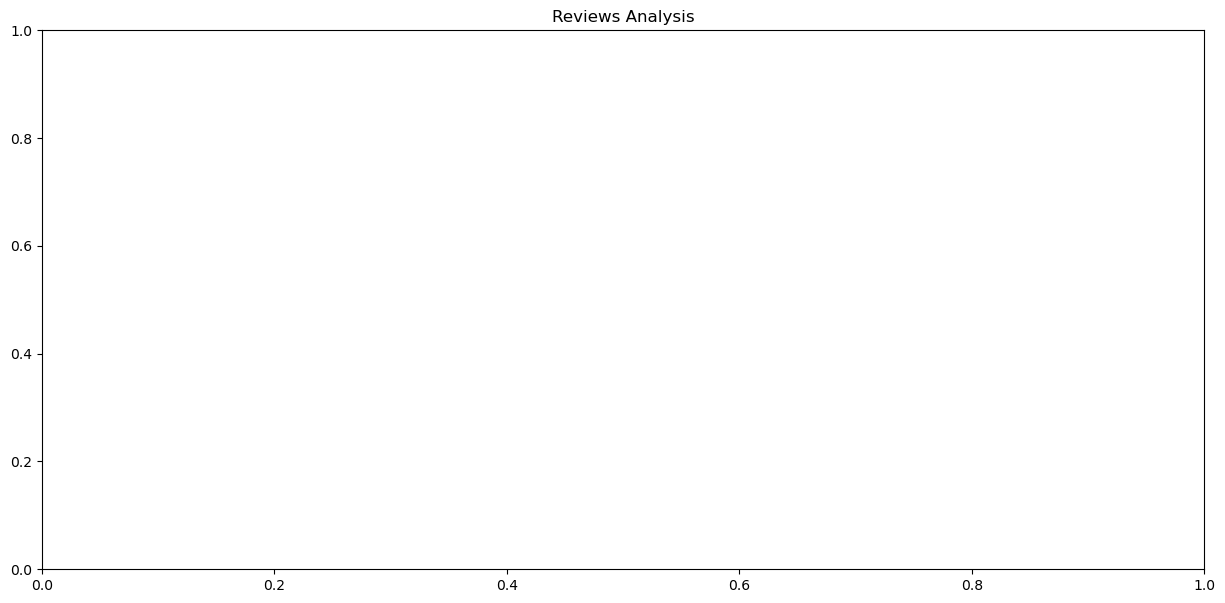

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))

plt.title("Reviews Analysis")
plt.bar(sentiment_counts.values, labels = sentiment_counts.index, explode = (0, 0, 0.2), autopct='%1.1f%%', shadow=False)
plt.show()

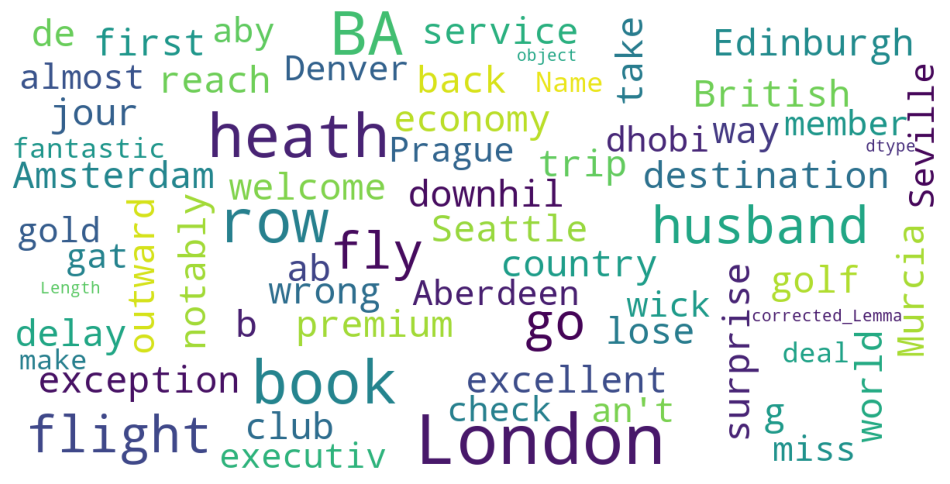

In [23]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=1000,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.corrected_Lemma)

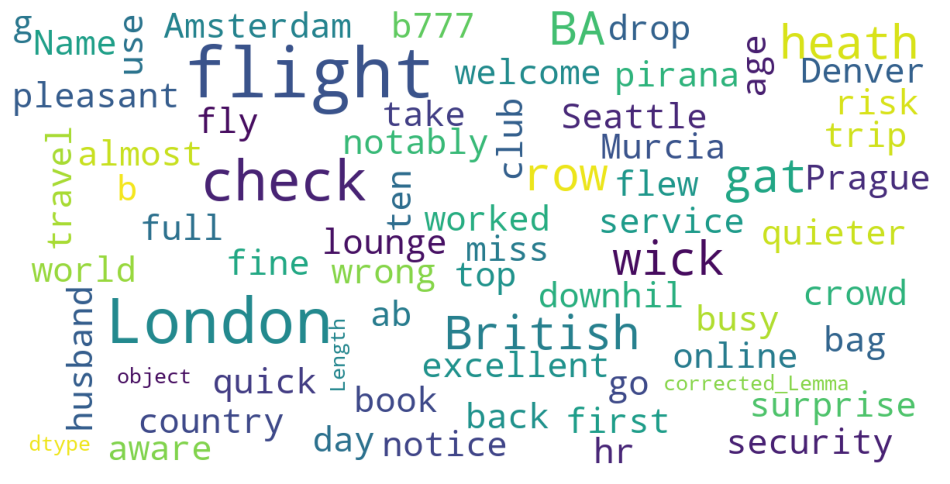

In [24]:
show_wordcloud(df['corrected_Lemma'][df['Sentiment Category']=='Positive'])

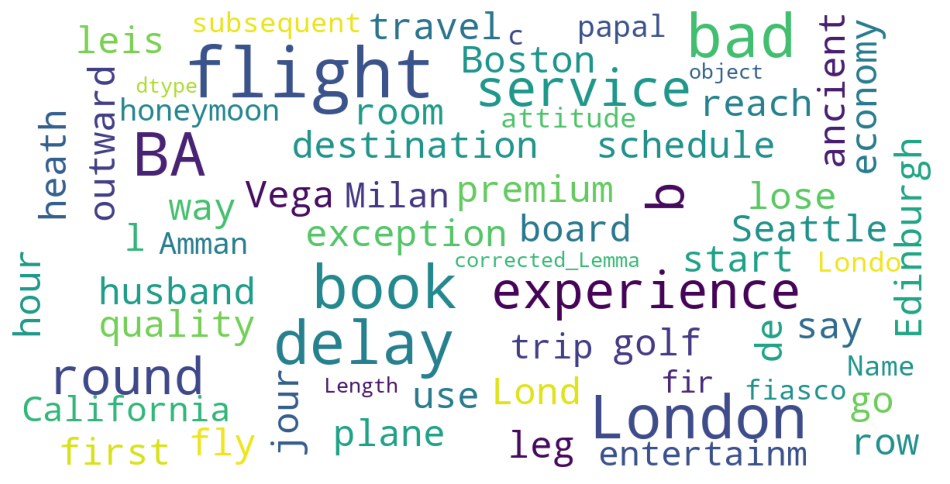

In [25]:
show_wordcloud(df['corrected_Lemma'][df['Sentiment Category']=='Negative'])

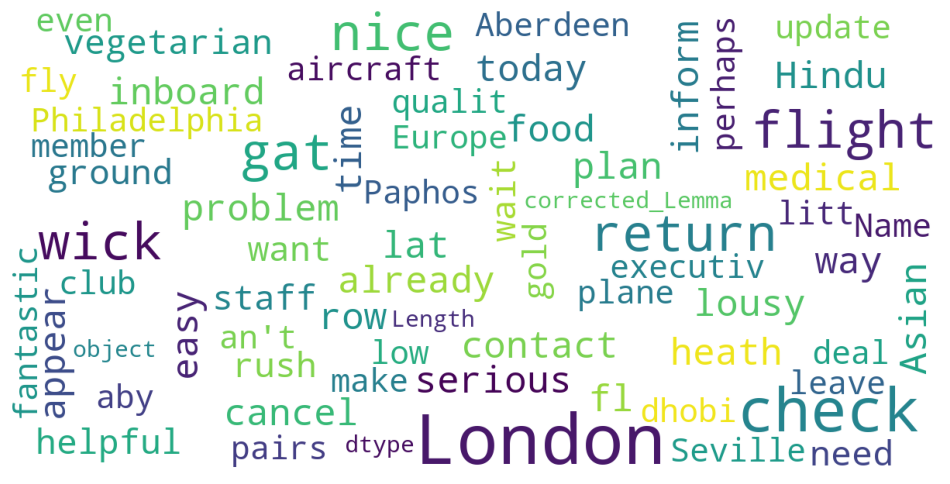

In [26]:
show_wordcloud(df['corrected_Lemma'][df['Sentiment Category']=='Neutral'])

In [27]:
df.to_csv('reviews_analysis')